In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/kc_data.csv")

In [ ]:
print(df.describe())

                 id      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   4.580302e+09      3.370842      2.114757   2079.899736  1.510697e+04   
std    2.876566e+09      0.930062      0.770163    918.440897  4.142051e+04   
min    1.000102e+06      0.000000      0.000000    290.000000  5.200000e+02   
25%    2.123049e+09      3.000000      1.750000   1427.000000  5.040000e+03   
50%    3.904930e+09      3.000000      2.250000   1910.000000  7.618000e+03   
75%    7.308900e+09      4.000000      2.500000   2550.000000  1.068800e+04   
max    9.900000e+09     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

<ipython-input-5-269f288e728f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


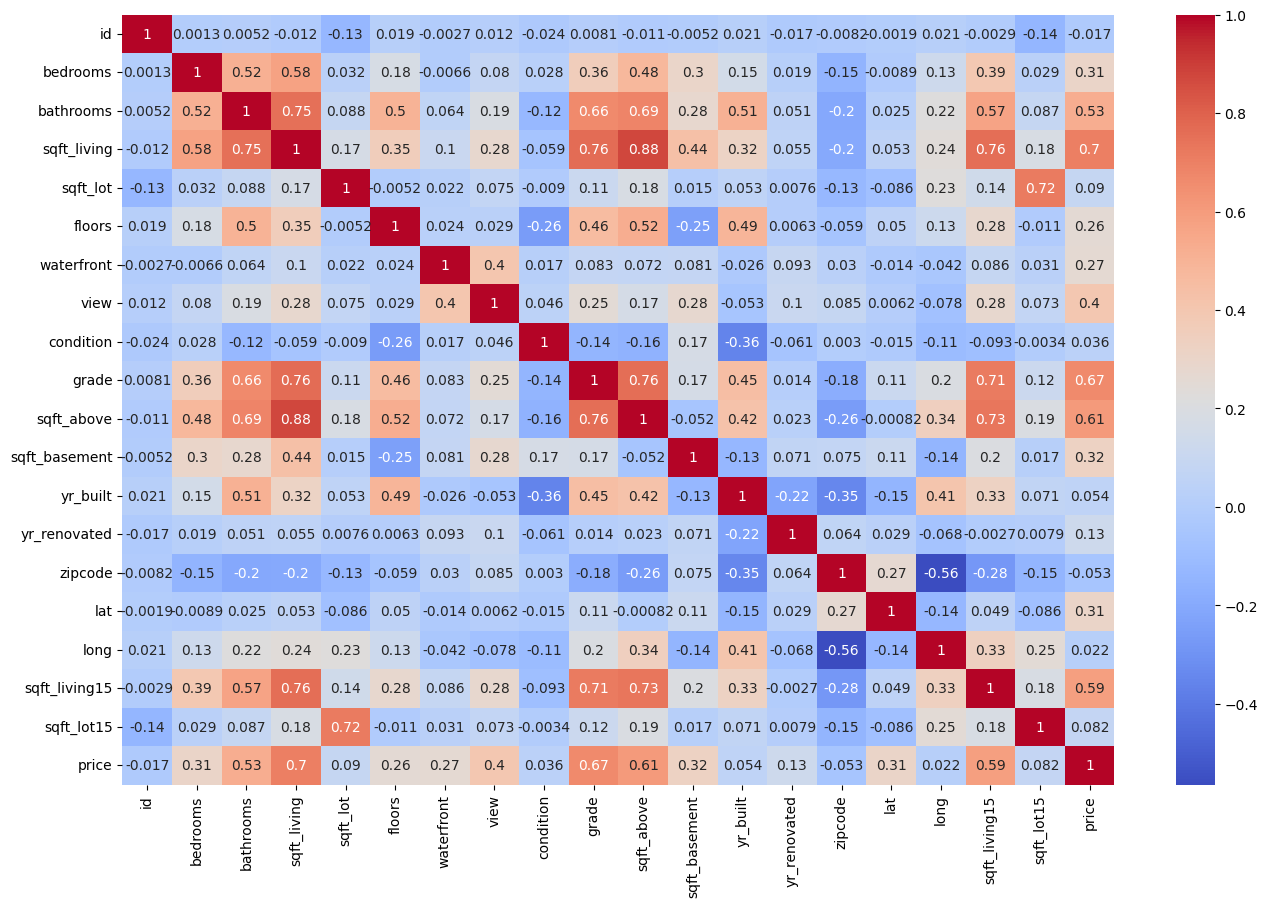

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
columns_to_drop = ['id', 'sqft_living', 'waterfront', 'condition','lat','long','zipcode','yr_renovated']
df.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
columns_to_drop = ['date']
df.drop(columns_to_drop, axis=1, inplace=True)

In [ ]:
df["sqft_above"].fillna(df["sqft_above"].mean(),inplace=True)

In [ ]:
feature_names = df.columns.tolist()
feature_names.remove('price')
X = df[feature_names]
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
decision_tree_regressor = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(decision_tree_regressor, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 67991321863.39695
R-squared: 0.5507815719490553
